In [1]:
from pyincore import IncoreClient
from pyincore import Dataset, FragilityService, MappingSet, DataService
from pyincore_viz.plotutil import PlotUtil as frag_plot
from pyincore_viz.geoutil import GeoUtil as viz

In [2]:
import pandas as pd
import geopandas as gpd # For reading in shapefiles : another way. 
import numpy as np
import os # For managing directories and file paths if drive is mounted

import matplotlib.pyplot as plt  # for plot.

In [3]:
# Display versions being used - important information for replication

import sys
print("Python Version     ", sys.version)
print("geopandas version: ", gpd.__version__)
print("pandas version:    ", pd.__version__)
print("numpy version:     ", np.__version__)
#print("folium version:    ", fm.__version__)



Python Version      3.7.10 | packaged by conda-forge | (default, Feb 19 2021, 15:37:01) [MSC v.1916 64 bit (AMD64)]
geopandas version:  0.9.0
pandas version:     1.3.3
numpy version:      1.21.2


In [4]:
client = IncoreClient()

Connection successful to IN-CORE services. pyIncore version detected: 1.0.0


In [5]:
data_service = DataService(client)

In [6]:
# Reading the updated building inventory: It contains the strctid
# Temporary Seaside, OR Building Inventory v6
building_inv = Dataset.from_file("IN-CORE_Seaside_BuildingInventory_2021-03-19.shp", data_type='ergo:buildingInventoryVer6')

In [7]:
# See the table. 
bldg_inv_gdf = gpd.read_file("IN-CORE_Seaside_BuildingInventory_2021-03-19.shp")
#bldg_inv_gdf.index # it shows the number of rows: here we have 4679 rows as buildings in Seaside comunity!  
# save/export the cs file!
bldg_inv_gdf.to_csv('buildingInventoryUpdate.csv', index=False)
bldg_inv_gdf.head()

,parid,parid_card,bldg_id,struct_typ,str_prob,year_built,no_stories,a_stories,b_stories,bsmt_type,...,stat_class,rmv_improv,rmv_land,elev,period,strctid,x,y,value_matc,geometry
0,None,None,None,W1,None,1968,1,None,None,None,...,193,0.0,0.0,-1.037119,0.35,41007020933038031S,-123.908997,46.014336,0,POINT (-123.90900 46.01433)
1,None,None,None,W1,None,1992,1,None,None,None,...,193,0.0,0.0,-14.826966,0.35,41007022416079053S,-123.905846,45.997948,0,POINT (-123.90585 45.99795)
2,None,None,None,W1,None,1974,1,None,None,None,...,191,0.0,0.0,-1.037119,0.35,41007020933038014S,-123.908997,46.014336,0,POINT (-123.90900 46.01433)
3,None,None,None,W1,None,1984,1,None,None,None,...,193,0.0,0.0,-1.037119,0.35,41007020933038018S,-123.908997,46.014336,0,POINT (-123.90900 46.01433)
4,None,None,None,W1,None,1964,1,None,None,None,...,190,0.0,0.0,-1.729172,0.35,41007022789002002S,-123.911827,45.997475,0,POINT (-123.91183 45.99747)


In [8]:
# See only couple important columns:
bldg_inv_gdf[['guid','strctid','struct_typ','year_built','occ_type']].head()

,guid,strctid,struct_typ,year_built,occ_type
0,fba4c73f-9b1b-4942-b7fb-bc276a4e0a4e,41007020933038031S,W1,1968,None
1,65d6e370-c05b-4b2f-bd17-d914d1d056c7,41007022416079053S,W1,1992,None
2,dad76485-9694-409e-ac7f-c64c7bd5c32c,41007020933038014S,W1,1974,None
3,6f57cfb6-d244-40d5-96f5-03aeddd5e30a,41007020933038018S,W1,1984,None
4,929f1040-6224-409d-b4e3-58946daf3b91,41007022789002002S,W1,1964,None


In [9]:
# another useful information: 
# total number of buildings = 4679
bldg_inv_gdf[['guid','strctid','struct_typ','year_built']].groupby('struct_typ').count()

,guid,strctid,year_built
struct_typ,,,
RC,1504,1504,1504
W1,2444,2444,2444
W2,731,731,731


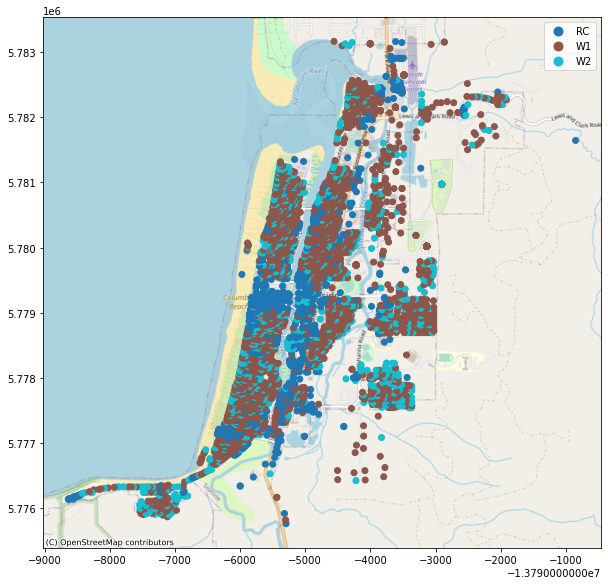

In [10]:
# Note: buildings in seaside consits of W1, W2, C1L, and C1M. (C1: concrete moment frame.)
map = viz.plot_gdf_map(bldg_inv_gdf,column='struct_typ')
map

In [11]:
# Housing Unit Inventory
housing_unit_inv_id = "5d543087b9219c0689b98234"
# load housing unit inventory as pandas dataframe
housing_unit_inv = Dataset.from_data_service(housing_unit_inv_id, data_service)
filename = housing_unit_inv.get_file_path('csv')
print("The IN-CORE Dataservice has saved the Housing Unit Inventory on your local machine: "+filename)

Dataset already exists locally. Reading from local cached zip.
Unzipped folder found in the local cache. Reading from it...
The IN-CORE Dataservice has saved the Housing Unit Inventory on your local machine: C:\Users\Mehrshad\.incore\cache_data\5d543087b9219c0689b98234\IN-CORE_1bv6_SetupSeaside_FourInventories_2019-08-02_HUinventory\IN-CORE_1bv6_SetupSeaside_FourInventories_2019-08-02_HUinventory.csv


In [12]:
housing_unit_inv_df = pd.read_csv(filename, header="infer")
housing_unit_inv_df.head()

,blockid,blockidstr,huid,livetype,numprec,ownershp,race,hispan,vacancy,gqtype,bgid
0,410079501001001,B410079501001001,B410079501001001H001,H,2,1.0,1.0,0.0,0,0,410079501001
1,410079501001001,B410079501001001,B410079501001001H002,H,2,2.0,1.0,0.0,0,0,410079501001
2,410079501001001,B410079501001001,B410079501001001H003,H,1,1.0,1.0,0.0,0,0,410079501001
3,410079501001003,B410079501001003,B410079501001003H001,H,4,2.0,4.0,0.0,0,0,410079501001
4,410079501001003,B410079501001003,B410079501001003H002,H,1,2.0,1.0,0.0,0,0,410079501001


In [13]:
# save/export the csv file!
housing_unit_inv_df.to_csv('housing_unit_inv_df.csv', index=False)

Test = housing_unit_inv_df['numprec'].sum()
print (Test)

36894


In [14]:
# Set up and run Housing Unit Allocation: 
# Seaside Address Point Inventory
address_point_inv_id = "5d542fefb9219c0689b981fb"
address_point_inv = Dataset.from_data_service(address_point_inv_id, data_service)

filename = address_point_inv.get_file_path('csv')
print("The IN-CORE Dataservice has saved the address point inv on your local machine: "+filename)

address_point_inv_df = pd.read_csv(filename, header="infer")
address_point_inv_df.head()

Dataset already exists locally. Reading from local cached zip.
Unzipped folder found in the local cache. Reading from it...
The IN-CORE Dataservice has saved the address point inv on your local machine: C:\Users\Mehrshad\.incore\cache_data\5d542fefb9219c0689b981fb\IN-CORE_1bv6_SetupSeaside_FourInventories_2019-08-02_addresspointinventory\IN-CORE_1bv6_SetupSeaside_FourInventories_2019-08-02_addresspointinventory.csv


,blockid,addrptid,strctid,x,y,huestimate,residential
0,410079511001025,41007000000020005S001001A,41007000000020005S,-123.900452,46.010494,1,1
1,410079511003005,41007000000020009S001001A,41007000000020009S,-123.932060,45.979836,1,1
2,410079507002020,41007020802001001S001001A,41007020802001001S,-123.918625,46.017567,1,1
3,410079507002040,41007020853008001S001001A,41007020853008001S,-123.913643,46.017326,1,1
4,410079507002040,41007020853008002S001001A,41007020853008002S,-123.913643,46.017326,1,1


In [15]:
from pyincore.analyses.housingunitallocation import HousingUnitAllocation

# Create housing allocation 
hua = HousingUnitAllocation(client)

# Load input dataset
hua.load_remote_input_dataset("housing_unit_inventory", housing_unit_inv_id)
hua.load_remote_input_dataset("address_point_inventory", address_point_inv_id)
#hua.load_remote_input_dataset("buildings", bldg_dataset_id)
hua.set_input_dataset("buildings", building_inv)

# Specify the result name
result_name = "Seaside_HUA"

seed = 1238
iterations = 10

# Set analysis parameters
hua.set_parameter("result_name", result_name)
hua.set_parameter("seed", seed)
hua.set_parameter("iterations", iterations)



Dataset already exists locally. Reading from local cached zip.
Unzipped folder found in the local cache. Reading from it...
Dataset already exists locally. Reading from local cached zip.
Unzipped folder found in the local cache. Reading from it...


True

In [16]:
# Run Housing unit allocation analysis
hua.run_analysis()

True

In [17]:
# Explore the result: 
# Retrieve result dataset:
hua_result = hua.get_output_dataset("result")

# Convert dataset to Pandas DataFrame
hua_df = hua_result.get_dataframe_from_csv(low_memory=False)

# Thus as a new column based on the number of stories: 
hua_df.loc[hua_df['no_stories'] < 4, 'descr_stories'] = 'low-rise'
hua_df.loc[hua_df['no_stories'] >= 4, 'descr_stories'] = 'mid-rise'
hua_df.loc[hua_df['no_stories'] >= 8, 'descr_stories'] = 'high-rise'

# filter out the NaN value for guid. 
#hua_df = hua_df[hua_df["numprec"].notna() & hua_df["guid"].notna()]
hua_df = hua_df[hua_df["guid"].notna()]

# save/export the cs file!
hua_df.to_csv('Housing_Unit_Allocation.csv', index=False)

hua_df.head()

,addrptid,parid,parid_card,bldg_id,struct_typ,str_prob,year_built,no_stories,a_stories,b_stories,...,ownershp,race,hispan,vacancy,gqtype,bgid,randomhu,aphumerge,geometry,descr_stories
0,41007020864002001S001001A,NaN,NaN,NaN,W1,NaN,1975.0,1.0,NaN,NaN,...,1.0,1.0,0.0,0.0,0.0,4.100795e+11,0.015815,both,POINT (-123.9034265041881 46.01749849919388),low-rise
1,41007021038001001S001001A,NaN,NaN,NaN,RC,NaN,0.0,1.0,NaN,NaN,...,1.0,1.0,0.0,0.0,0.0,4.100795e+11,0.024934,both,POINT (-123.8960661064165 46.01272230816045),low-rise
2,41007020864002002S001001A,NaN,NaN,NaN,W1,NaN,2003.0,1.0,NaN,NaN,...,1.0,1.0,0.0,0.0,0.0,4.100795e+11,0.039769,both,POINT (-123.9034265041881 46.01749849919388),low-rise
3,41007020956001001S001001A,NaN,NaN,NaN,W1,NaN,1979.0,1.0,NaN,NaN,...,1.0,1.0,0.0,0.0,0.0,4.100795e+11,0.089136,both,POINT (-123.9002451964179 46.01352343272472),low-rise
4,41007021172001001S001001A,NaN,NaN,NaN,W1,NaN,2002.0,1.0,NaN,NaN,...,1.0,1.0,0.0,0.0,0.0,4.100795e+11,0.173216,both,POINT (-123.8971825599634 46.01202832179288),low-rise


In [18]:
# plot couple important columns:
hua_df[['guid','no_stories','struct_typ','numprec','ownershp','geometry','aphumerge', 'descr_stories']].head()

,guid,no_stories,struct_typ,numprec,ownershp,geometry,aphumerge,descr_stories
0,37532fb5-5107-478b-ab2c-158eb001c68b,1.0,W1,2.0,1.0,POINT (-123.9034265041881 46.01749849919388),both,low-rise
1,e38d8575-7880-4a8c-b6d7-225ab1cf9264,1.0,RC,2.0,1.0,POINT (-123.8960661064165 46.01272230816045),both,low-rise
2,af5771b4-4f42-4166-b772-78a3706fa8ac,1.0,W1,2.0,1.0,POINT (-123.9034265041881 46.01749849919388),both,low-rise
3,66d39314-1c68-4634-a82c-8fcb37f529ff,1.0,W1,5.0,1.0,POINT (-123.9002451964179 46.01352343272472),both,low-rise
4,8f6e055b-2df8-461b-80a0-ba0c1f65add5,1.0,W1,3.0,1.0,POINT (-123.8971825599634 46.01202832179288),both,low-rise


In [19]:
# Test: find the number of people in each building: 
# .groupby data by building (GUID) and then sum the numprec.  

Test_1 = hua_df.groupby(['guid'])['numprec'].sum()

Test_1

guid
0003c653-233c-455b-a71e-d8f4a28ef8b5    2.0
0004321a-e6dc-48af-80bd-f06f376110a7    2.0
0015aa86-c214-407c-b879-d0a5f90627c6    0.0
00383daa-2b5e-4a5b-8495-cf5442692171    0.0
00430e85-d86b-4ee0-b6fc-ffe715ebf348    0.0
                                       ... 
ffc92a79-dfc2-47be-94be-700587debae9    0.0
ffd8e0f7-9d5e-4388-afa6-3c69280eadbc    3.0
ffdbf8d3-c442-412f-8003-8d715bbb5477    0.0
ffedfa6e-8b4d-4135-bda2-26c35243dc3d    3.0
fff5d02d-936d-47d3-a204-106c9fc9ebab    0.0
Name: numprec, Length: 4679, dtype: float64

In [20]:
# Total number of GUID.
len(Test_1)

4679

In [21]:
# double check the total population! 
Test_1.sum()

6644.0

In [22]:
# Find the number of peaople in each block: based on blockid

Test_2 = hua_df.groupby(['blockid'])['numprec'].sum()
Test_2.head()

blockid
4.100795e+14    11.0
4.100795e+14    41.0
4.100795e+14    28.0
4.100795e+14    18.0
4.100795e+14    22.0
Name: numprec, dtype: float64

In [23]:
# double check the total population! 
Test_2.sum()

6644.0

In [24]:
# check total number of housing units: 

Test_22 = hua_df.groupby(['huid'])
len(Test_22)



4741

In [25]:
# Import the property type function: 
from property_types import assign_property_types

# Run the function over hau_df dataframe
hua_df_update = assign_property_types(hua_df)

# save/export the cs file!
hua_df_update.to_csv('Housing_Unit_Allocation_Update.csv', index=False)

hua_df_update.head()

,addrptid,parid,parid_card,bldg_id,struct_typ,str_prob,year_built,no_stories,a_stories,b_stories,...,race,hispan,vacancy,gqtype,bgid,randomhu,aphumerge,geometry,descr_stories,landuse
0,41007020864002001S001001A,NaN,NaN,NaN,W1,NaN,1975.0,1.0,NaN,NaN,...,1.0,0.0,0.0,0.0,4.100795e+11,0.015815,both,POINT (-123.9034265041881 46.01749849919388),low-rise,residential
1,41007021038001001S001001A,NaN,NaN,NaN,RC,NaN,0.0,1.0,NaN,NaN,...,1.0,0.0,0.0,0.0,4.100795e+11,0.024934,both,POINT (-123.8960661064165 46.01272230816045),low-rise,residential
2,41007020864002002S001001A,NaN,NaN,NaN,W1,NaN,2003.0,1.0,NaN,NaN,...,1.0,0.0,0.0,0.0,4.100795e+11,0.039769,both,POINT (-123.9034265041881 46.01749849919388),low-rise,residential
3,41007020956001001S001001A,NaN,NaN,NaN,W1,NaN,1979.0,1.0,NaN,NaN,...,1.0,0.0,0.0,0.0,4.100795e+11,0.089136,both,POINT (-123.9002451964179 46.01352343272472),low-rise,residential
4,41007021172001001S001001A,NaN,NaN,NaN,W1,NaN,2002.0,1.0,NaN,NaN,...,1.0,0.0,0.0,0.0,4.100795e+11,0.173216,both,POINT (-123.8971825599634 46.01202832179288),low-rise,residential


In [26]:
# guid = building id ; huid = housing unit id 
# we do not have huid for commercial buildings. 

Test_3 = hua_df_update.groupby(['landuse', 'numprec'])[['guid','huid']].count()
Test_3

guid  huid
landuse         numprec            
commercial      0.0      2239     0
residential     0.0         9     9
                1.0      1159  1159
                2.0      1061  1061
                3.0       356   356
                4.0       261   261
                5.0       131   131
                6.0        56    56
                7.0        32    32
                17.0        1     1
                19.0        1     1
seasonal_rental 0.0      1278  1278
unoccupied      0.0       396   396

In [27]:
# Total number of GUID must be 4679 from the previous section.
Test_4 = hua_df_update.groupby(['guid'])['numprec'].sum()

len(Test_4)

4679

In [28]:
# total number of housing units: 
Test_5 = hua_df_update.groupby(['huid'])['numprec'].sum()

len(Test_5)


4741

In [29]:
# export the csv file: building GUID vs population in each building. 

Test_4.to_csv('building_population_inv.csv')


In [30]:
# check the population: It must be 6644.
Test_4.sum()

6644.0

In [31]:
# New line of code: only keep comercial units now:

hua_df_update_commercial = hua_df_update[hua_df_update.landuse == 'commercial']
hua_df_update_commercial

,addrptid,parid,parid_card,bldg_id,struct_typ,str_prob,year_built,no_stories,a_stories,b_stories,...,race,hispan,vacancy,gqtype,bgid,randomhu,aphumerge,geometry,descr_stories,landuse
21579,41007021173001001S002002A,NaN,NaN,NaN,W1,NaN,2003.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,left_only,POINT (-123.8967835693363 46.01191716464053),low-rise,commercial
21580,41007021161001001S002002A,NaN,NaN,NaN,W2,NaN,1992.0,2.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,left_only,POINT (-123.8950267440958 46.01221368125638),low-rise,commercial
21581,41007020933038025S001001A,NaN,NaN,NaN,W1,NaN,1972.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,left_only,POINT (-123.9089960881224 46.01433439263687),low-rise,commercial
21582,41007020933038010S001001A,NaN,NaN,NaN,W1,NaN,1973.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,left_only,POINT (-123.9089960881224 46.01433439263687),low-rise,commercial
21583,41007020933038016S001001A,NaN,NaN,NaN,W1,NaN,1975.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,left_only,POINT (-123.9089960881224 46.01433439263687),low-rise,commercial
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23813,NaN,NaN,NaN,NaN,W1,NaN,1947.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,left_only,POINT (-123.9132313440788 46.0027362415393),low-rise,commercial
23814,NaN,NaN,NaN,NaN,RC,NaN,2003.0,6.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,left_only,POINT (-123.9295244064632 45.99291474004349),mid-rise,commercial
23815,NaN,NaN,NaN,NaN,RC,NaN,2003.0,6.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,left_only,POINT (-123.9288606437054 45.9924238405924),mid-rise,commercial
23816,NaN,NaN,NaN,NaN,RC,NaN,1973.0,6.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,left_only,POINT (-123.9109342313426 45.99243851792126),mid-rise,commercial


In [32]:
# Example
hua_df_update_commercial.loc[hua_df_update_commercial['guid'] == "32525316-9410-474d-8169-b695f89eef87"]


,addrptid,parid,parid_card,bldg_id,struct_typ,str_prob,year_built,no_stories,a_stories,b_stories,...,race,hispan,vacancy,gqtype,bgid,randomhu,aphumerge,geometry,descr_stories,landuse
21621,41007021162001001S037028A,NaN,NaN,NaN,RC,NaN,2007.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,left_only,POINT (-123.9089386212166 46.01109943010027),low-rise,commercial
21622,41007021162001001S037036A,NaN,NaN,NaN,RC,NaN,2007.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,left_only,POINT (-123.9089386212166 46.01109943010027),low-rise,commercial
21623,41007021162001001S037003A,NaN,NaN,NaN,RC,NaN,2007.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,left_only,POINT (-123.9089386212166 46.01109943010027),low-rise,commercial
21624,41007021162001001S037031A,NaN,NaN,NaN,RC,NaN,2007.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,left_only,POINT (-123.9089386212166 46.01109943010027),low-rise,commercial
21625,41007021162001001S037005A,NaN,NaN,NaN,RC,NaN,2007.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,left_only,POINT (-123.9089386212166 46.01109943010027),low-rise,commercial
21626,41007021162001001S037007A,NaN,NaN,NaN,RC,NaN,2007.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,left_only,POINT (-123.9089386212166 46.01109943010027),low-rise,commercial
21627,41007021162001001S037025A,NaN,NaN,NaN,RC,NaN,2007.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,left_only,POINT (-123.9089386212166 46.01109943010027),low-rise,commercial
21628,41007021162001001S037012A,NaN,NaN,NaN,RC,NaN,2007.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,left_only,POINT (-123.9089386212166 46.01109943010027),low-rise,commercial
21629,41007021162001001S037027A,NaN,NaN,NaN,RC,NaN,2007.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,left_only,POINT (-123.9089386212166 46.01109943010027),low-rise,commercial
21630,41007021162001001S037009A,NaN,NaN,NaN,RC,NaN,2007.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,left_only,POINT (-123.9089386212166 46.01109943010027),low-rise,commercial


In [33]:
# drop some tricky columns here!! 

hua_df_update_commercial.drop(columns=['randomap', 'randommergeorder', 'huid', 'numprec', 'randomhu' ])


,addrptid,parid,parid_card,bldg_id,struct_typ,str_prob,year_built,no_stories,a_stories,b_stories,...,ownershp,race,hispan,vacancy,gqtype,bgid,aphumerge,geometry,descr_stories,landuse
21579,41007021173001001S002002A,NaN,NaN,NaN,W1,NaN,2003.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,left_only,POINT (-123.8967835693363 46.01191716464053),low-rise,commercial
21580,41007021161001001S002002A,NaN,NaN,NaN,W2,NaN,1992.0,2.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,left_only,POINT (-123.8950267440958 46.01221368125638),low-rise,commercial
21581,41007020933038025S001001A,NaN,NaN,NaN,W1,NaN,1972.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,left_only,POINT (-123.9089960881224 46.01433439263687),low-rise,commercial
21582,41007020933038010S001001A,NaN,NaN,NaN,W1,NaN,1973.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,left_only,POINT (-123.9089960881224 46.01433439263687),low-rise,commercial
21583,41007020933038016S001001A,NaN,NaN,NaN,W1,NaN,1975.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,left_only,POINT (-123.9089960881224 46.01433439263687),low-rise,commercial
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23813,NaN,NaN,NaN,NaN,W1,NaN,1947.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,left_only,POINT (-123.9132313440788 46.0027362415393),low-rise,commercial
23814,NaN,NaN,NaN,NaN,RC,NaN,2003.0,6.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,left_only,POINT (-123.9295244064632 45.99291474004349),mid-rise,commercial
23815,NaN,NaN,NaN,NaN,RC,NaN,2003.0,6.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,left_only,POINT (-123.9288606437054 45.9924238405924),mid-rise,commercial
23816,NaN,NaN,NaN,NaN,RC,NaN,1973.0,6.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,left_only,POINT (-123.9109342313426 45.99243851792126),mid-rise,commercial


In [34]:
# commercial guids are repeated there! 
hua_df_update_commercial.groupby(['guid']).size().reset_index(name='counts')

,guid,counts
0,00383daa-2b5e-4a5b-8495-cf5442692171,1
1,0044af29-0512-485e-87d8-1f23568f1641,1
2,00773410-b137-4179-b4aa-57c8513ae387,5
3,00a27a64-e1ec-4489-93aa-8560945aadad,2
4,00c9cc54-20d1-4f8c-9454-5f0f8cf23f86,1
...,...,...
1509,ff9b4bc6-0dd0-4774-a7ce-fe8cb4791327,1
1510,ffa49026-2f63-46c4-a3a3-288f5d0230a7,1
1511,ffbd1b0f-a5ba-4e96-a0cf-b7ae213dde8a,1
1512,ffc92a79-dfc2-47be-94be-700587debae9,1


In [35]:
# groupby() to deal with repetitions! 
TestTest = hua_df_update_commercial.groupby(['guid'])
TestTest.first()

,addrptid,parid,parid_card,bldg_id,struct_typ,str_prob,year_built,no_stories,a_stories,b_stories,...,race,hispan,vacancy,gqtype,bgid,randomhu,aphumerge,geometry,descr_stories,landuse
guid,,,,,,,,,,,,,,,,,,,,,
00383daa-2b5e-4a5b-8495-cf5442692171,None,NaN,NaN,NaN,RC,NaN,2007.0,4.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,left_only,POINT (-123.9234975548792 45.9951844131166),mid-rise,commercial
0044af29-0512-485e-87d8-1f23568f1641,None,NaN,NaN,NaN,RC,NaN,1997.0,6.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,left_only,POINT (-123.9301167478828 45.99179176350815),mid-rise,commercial
00773410-b137-4179-b4aa-57c8513ae387,41007024491001001S009005A,NaN,NaN,NaN,RC,NaN,2004.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,left_only,POINT (-123.9241133283166 45.98965111407895),low-rise,commercial
00a27a64-e1ec-4489-93aa-8560945aadad,41007021206001001S002002A,NaN,NaN,NaN,W2,NaN,1979.0,2.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,left_only,POINT (-123.9065578819019 46.01141517709458),low-rise,commercial
00c9cc54-20d1-4f8c-9454-5f0f8cf23f86,None,NaN,NaN,NaN,RC,NaN,2003.0,6.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,left_only,POINT (-123.929652725836 45.99235770950414),mid-rise,commercial
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ff9b4bc6-0dd0-4774-a7ce-fe8cb4791327,None,NaN,NaN,NaN,W1,NaN,1942.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,left_only,POINT (-123.9368350493015 45.9777269211251),low-rise,commercial
ffa49026-2f63-46c4-a3a3-288f5d0230a7,None,NaN,NaN,NaN,RC,NaN,1961.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,left_only,POINT (-123.9235672897296 45.99226197603154),low-rise,commercial
ffbd1b0f-a5ba-4e96-a0cf-b7ae213dde8a,None,NaN,NaN,NaN,RC,NaN,1952.0,6.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,left_only,POINT (-123.9334693450498 45.98051963203108),mid-rise,commercial


In [36]:
type(TestTest)

pandas.core.groupby.generic.DataFrameGroupBy

In [37]:
# convert the Pandas Grouby output from series to Dataframe
New = pd.DataFrame(TestTest.size().reset_index(name = "landuse"))
New

,guid,landuse
0,00383daa-2b5e-4a5b-8495-cf5442692171,1
1,0044af29-0512-485e-87d8-1f23568f1641,1
2,00773410-b137-4179-b4aa-57c8513ae387,5
3,00a27a64-e1ec-4489-93aa-8560945aadad,2
4,00c9cc54-20d1-4f8c-9454-5f0f8cf23f86,1
...,...,...
1509,ff9b4bc6-0dd0-4774-a7ce-fe8cb4791327,1
1510,ffa49026-2f63-46c4-a3a3-288f5d0230a7,1
1511,ffbd1b0f-a5ba-4e96-a0cf-b7ae213dde8a,1
1512,ffc92a79-dfc2-47be-94be-700587debae9,1


In [38]:
Neww = New.drop(columns=['landuse'])
Neww

,guid
0,00383daa-2b5e-4a5b-8495-cf5442692171
1,0044af29-0512-485e-87d8-1f23568f1641
2,00773410-b137-4179-b4aa-57c8513ae387
3,00a27a64-e1ec-4489-93aa-8560945aadad
4,00c9cc54-20d1-4f8c-9454-5f0f8cf23f86
...,...
1509,ff9b4bc6-0dd0-4774-a7ce-fe8cb4791327
1510,ffa49026-2f63-46c4-a3a3-288f5d0230a7
1511,ffbd1b0f-a5ba-4e96-a0cf-b7ae213dde8a
1512,ffc92a79-dfc2-47be-94be-700587debae9


In [39]:
# now merge it with our building inventory (default one) 
result = Neww.merge(bldg_inv_gdf,left_on='guid', right_on='guid')
result


,guid,parid,parid_card,bldg_id,struct_typ,str_prob,year_built,no_stories,a_stories,b_stories,...,stat_class,rmv_improv,rmv_land,elev,period,strctid,x,y,value_matc,geometry
0,00383daa-2b5e-4a5b-8495-cf5442692171,None,None,None,RC,None,2007,4,None,None,...,413,232071.0,0.0,-2.340334,0.75,00383daa-2b5e-4a5b-8495-cf5442692171,NaN,NaN,1,POINT (-123.92350 45.99518)
1,0044af29-0512-485e-87d8-1f23568f1641,None,None,None,RC,None,1997,6,None,None,...,900,309880.0,0.0,-4.838061,0.75,0044af29-0512-485e-87d8-1f23568f1641,NaN,NaN,1,POINT (-123.93012 45.99179)
2,00773410-b137-4179-b4aa-57c8513ae387,None,None,None,RC,None,2004,1,None,None,...,443,790937.0,339599.0,-2.652559,0.40,41007024491001001S,-123.924110,45.989651,0,POINT (-123.92411 45.98965)
3,00a27a64-e1ec-4489-93aa-8560945aadad,None,None,None,W2,None,1979,2,None,None,...,232,129243.0,85452.0,-0.824538,0.40,41007021206001001S,-123.906555,46.011414,0,POINT (-123.90656 46.01142)
4,00c9cc54-20d1-4f8c-9454-5f0f8cf23f86,None,None,None,RC,None,2003,6,None,None,...,900,180017.0,0.0,-4.611768,0.75,00c9cc54-20d1-4f8c-9454-5f0f8cf23f86,NaN,NaN,1,POINT (-123.92965 45.99236)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1509,ff9b4bc6-0dd0-4774-a7ce-fe8cb4791327,None,None,None,W1,None,1942,1,None,None,...,143,149756.0,781488.0,0.000046,0.35,ff9b4bc6-0dd0-4774-a7ce-fe8cb4791327,NaN,NaN,0,POINT (-123.93684 45.97773)
1510,ffa49026-2f63-46c4-a3a3-288f5d0230a7,None,None,None,RC,None,1961,1,None,None,...,430,557254.0,704322.0,-3.051440,0.40,ffa49026-2f63-46c4-a3a3-288f5d0230a7,NaN,NaN,0,POINT (-123.92357 45.99226)
1511,ffbd1b0f-a5ba-4e96-a0cf-b7ae213dde8a,None,None,None,RC,None,1952,6,None,None,...,900,199767.0,0.0,-4.234170,0.75,ffbd1b0f-a5ba-4e96-a0cf-b7ae213dde8a,NaN,NaN,1,POINT (-123.93347 45.98052)
1512,ffc92a79-dfc2-47be-94be-700587debae9,None,None,None,RC,None,1945,1,None,None,...,451,36286.0,152871.0,-3.035857,0.40,41007024256001001S,-123.922935,45.990990,0,POINT (-123.92293 45.99099)


In [40]:
result['landuse'] = 'commercial'
result

,guid,parid,parid_card,bldg_id,struct_typ,str_prob,year_built,no_stories,a_stories,b_stories,...,rmv_improv,rmv_land,elev,period,strctid,x,y,value_matc,geometry,landuse
0,00383daa-2b5e-4a5b-8495-cf5442692171,None,None,None,RC,None,2007,4,None,None,...,232071.0,0.0,-2.340334,0.75,00383daa-2b5e-4a5b-8495-cf5442692171,NaN,NaN,1,POINT (-123.92350 45.99518),commercial
1,0044af29-0512-485e-87d8-1f23568f1641,None,None,None,RC,None,1997,6,None,None,...,309880.0,0.0,-4.838061,0.75,0044af29-0512-485e-87d8-1f23568f1641,NaN,NaN,1,POINT (-123.93012 45.99179),commercial
2,00773410-b137-4179-b4aa-57c8513ae387,None,None,None,RC,None,2004,1,None,None,...,790937.0,339599.0,-2.652559,0.40,41007024491001001S,-123.924110,45.989651,0,POINT (-123.92411 45.98965),commercial
3,00a27a64-e1ec-4489-93aa-8560945aadad,None,None,None,W2,None,1979,2,None,None,...,129243.0,85452.0,-0.824538,0.40,41007021206001001S,-123.906555,46.011414,0,POINT (-123.90656 46.01142),commercial
4,00c9cc54-20d1-4f8c-9454-5f0f8cf23f86,None,None,None,RC,None,2003,6,None,None,...,180017.0,0.0,-4.611768,0.75,00c9cc54-20d1-4f8c-9454-5f0f8cf23f86,NaN,NaN,1,POINT (-123.92965 45.99236),commercial
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1509,ff9b4bc6-0dd0-4774-a7ce-fe8cb4791327,None,None,None,W1,None,1942,1,None,None,...,149756.0,781488.0,0.000046,0.35,ff9b4bc6-0dd0-4774-a7ce-fe8cb4791327,NaN,NaN,0,POINT (-123.93684 45.97773),commercial
1510,ffa49026-2f63-46c4-a3a3-288f5d0230a7,None,None,None,RC,None,1961,1,None,None,...,557254.0,704322.0,-3.051440,0.40,ffa49026-2f63-46c4-a3a3-288f5d0230a7,NaN,NaN,0,POINT (-123.92357 45.99226),commercial
1511,ffbd1b0f-a5ba-4e96-a0cf-b7ae213dde8a,None,None,None,RC,None,1952,6,None,None,...,199767.0,0.0,-4.234170,0.75,ffbd1b0f-a5ba-4e96-a0cf-b7ae213dde8a,NaN,NaN,1,POINT (-123.93347 45.98052),commercial
1512,ffc92a79-dfc2-47be-94be-700587debae9,None,None,None,RC,None,1945,1,None,None,...,36286.0,152871.0,-3.035857,0.40,41007024256001001S,-123.922935,45.990990,0,POINT (-123.92293 45.99099),commercial


In [41]:
result['guid'].describe()

count                                     1514
unique                                    1514
top       00383daa-2b5e-4a5b-8495-cf5442692171
freq                                         1
Name: guid, dtype: object

In [42]:
type(result)

pandas.core.frame.DataFrame

In [43]:
# save the dataframe as csv file: 

result.to_csv('building_df_new.csv')

In [44]:
# to access new package that is in a sibling folder - the system path list needs to inlcude the parent folder (..)
# append the path of the
# parent directory
sys.path.append("..")

In [45]:
# Convert dataframe to gdf

# open, read, and execute python program with reusable commands
import pyincore_addons.geoutil_20210618 as add2incore

# since the geoutil is under construction it might need to be reloaded
from importlib import reload 
add2incore = reload(add2incore)

# Print list of add on functions
from inspect import getmembers, isfunction
print(getmembers(add2incore,isfunction))




[('df2gdf_WKTgeometry', <function df2gdf_WKTgeometry at 0x0000017175865558>), ('nearest_pt_search', <function nearest_pt_search at 0x0000017177684DC8>)]


In [46]:
# Convert dataframe to gdf

building_df = pd.read_csv('building_df_new.csv')

building_gdf = add2incore.df2gdf_WKTgeometry(df = building_df, projection = "epsg:4326",reproject="epsg:26910")
building_gdf.head()

,Unnamed: 0,guid,parid,parid_card,bldg_id,struct_typ,str_prob,year_built,no_stories,a_stories,...,rmv_improv,rmv_land,elev,period,strctid,x,y,value_matc,geometry,landuse
0,0,00383daa-2b5e-4a5b-8495-cf5442692171,NaN,NaN,NaN,RC,NaN,2007,4,NaN,...,232071.0,0.0,-2.340334,0.75,00383daa-2b5e-4a5b-8495-cf5442692171,NaN,NaN,1,POINT (428485.875 5093927.767),commercial
1,1,0044af29-0512-485e-87d8-1f23568f1641,NaN,NaN,NaN,RC,NaN,1997,6,NaN,...,309880.0,0.0,-4.838061,0.75,0044af29-0512-485e-87d8-1f23568f1641,NaN,NaN,1,POINT (427968.896 5093556.797),commercial
2,2,00773410-b137-4179-b4aa-57c8513ae387,NaN,NaN,NaN,RC,NaN,2004,1,NaN,...,790937.0,339599.0,-2.652559,0.40,41007024491001001S,-123.924110,45.989651,0,POINT (428431.054 5093313.539),commercial
3,3,00a27a64-e1ec-4489-93aa-8560945aadad,NaN,NaN,NaN,W2,NaN,1979,2,NaN,...,129243.0,85452.0,-0.824538,0.40,41007021206001001S,-123.906555,46.011414,0,POINT (429818.180 5095715.995),commercial
4,4,00c9cc54-20d1-4f8c-9454-5f0f8cf23f86,NaN,NaN,NaN,RC,NaN,2003,6,NaN,...,180017.0,0.0,-4.611768,0.75,00c9cc54-20d1-4f8c-9454-5f0f8cf23f86,NaN,NaN,1,POINT (428005.565 5093619.257),commercial


In [47]:
len(building_gdf)

1514

Map of commercial buildings 10 in Seaside


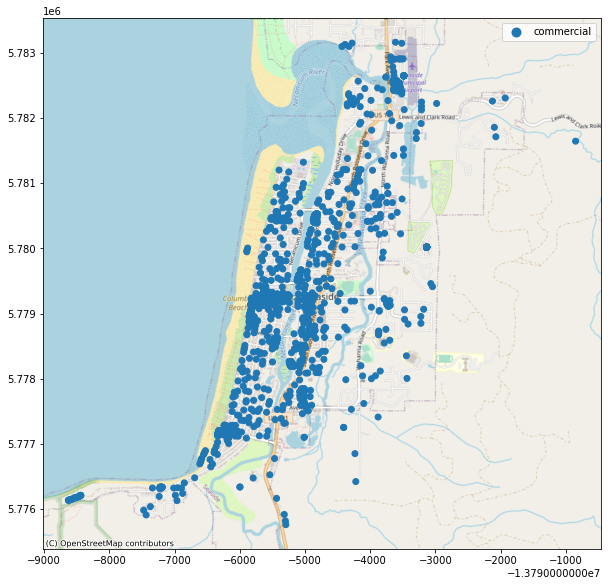

In [48]:
map = viz.plot_gdf_map(building_gdf,column='landuse', category=True)
print("Map of commercial buildings 10 in Seaside")
map

In [49]:
building_gdf['guid'].describe()

count                                     1514
unique                                    1514
top       00383daa-2b5e-4a5b-8495-cf5442692171
freq                                         1
Name: guid, dtype: object

In [50]:
# Read the data purchased from the Data Axle: 


Data_Axle = pd.read_csv ('REFUSA_1av1_ObtainReferenceUSA_2016_ClatsopOR.csv')

Data_Axle_Seaside = Data_Axle.loc[Data_Axle['City'] == "SEASIDE"]
#Data_Axle_Seaside_Edit = Data_Axle_Seaside[['COMPANY NAME','ADDRESS','CITY', 'LOCATION ADDRESS', 'LOCATION ADDRESS CITY', 'LOCATION ADDRESS ZIP', 'ACTUAL EMPLOYEE SIZE', 'EMPLOYEE SIZE RANGE', 'PRIMARY SIC', 'PRIMARY SIC DESCRIPTION', 'SQUARE FOOTAGE']]
Data_Axle_Seaside_edit = Data_Axle_Seaside.reset_index(drop=True)


# creat the geometry column for the data: 
from shapely.geometry import Point

geometry = [Point(xy) for xy in zip(Data_Axle_Seaside_edit.Longitude, Data_Axle_Seaside_edit.Latitude)]
Data_Axle_Seaside_final = gpd.GeoDataFrame(Data_Axle_Seaside_edit, geometry=geometry)
Data_Axle_Seaside_final.head()



,Company_ID,Company,Address_Line_1,City,State,ZipCode,Zip4,County_Code,Area_Code,IDCode,...,Latitude,Longitude,Match_Code,CBSA_Code,CBSA_Level,CSA_Code,FIPS_Code,franchise,NAICS2D,geometry
0,124479,BRIDGE TENDER,554 BROADWAY ST,SEASIDE,OR,97138,5825.0,7,503,2,...,45.993275,-123.924740,P,11820,1,0,41007,NaN,72,POINT (-123.92474 45.99327)
1,124489,CITY CENTER MOTEL SEASIDE,250 1ST AVE,SEASIDE,OR,97138,5906.0,7,503,2,...,45.994580,-123.926970,P,11820,1,0,41007,NaN,72,POINT (-123.92697 45.99458)
2,124507,BEACHSIDE INN,300 5TH AVE,SEASIDE,OR,97138,6018.0,7,503,2,...,45.997303,-123.926649,P,11820,1,0,41007,NaN,72,POINT (-123.92665 45.99730)
3,124513,HI TIDE MOTEL,30 AVENUE G,SEASIDE,OR,97138,5513.0,7,503,2,...,45.990147,-123.930572,0,11820,1,0,41007,NaN,72,POINT (-123.93057 45.99015)
4,124514,HILLCREST INN & HILLCREST HSE,118 N COLUMBIA ST,SEASIDE,OR,97138,5932.0,7,503,2,...,45.994950,-123.927950,P,11820,1,0,41007,NaN,72,POINT (-123.92795 45.99495)


In [51]:
len(Data_Axle_Seaside_final)

810

In [52]:
# Export the data as a csv file: 
Data_Axle_Seaside_final.to_csv('Data_Axle_Seaside_Final.csv', index=False)

In [53]:
# Convert dataframe to gdf

data_axle_building_df = pd.read_csv('Data_Axle_Seaside_Final.csv')

commercial_gdf = add2incore.df2gdf_WKTgeometry(df = data_axle_building_df, projection = "epsg:4326",reproject="epsg:26910")
commercial_gdf.head()

,Company_ID,Company,Address_Line_1,City,State,ZipCode,Zip4,County_Code,Area_Code,IDCode,...,Latitude,Longitude,Match_Code,CBSA_Code,CBSA_Level,CSA_Code,FIPS_Code,franchise,NAICS2D,geometry
0,124479,BRIDGE TENDER,554 BROADWAY ST,SEASIDE,OR,97138,5825.0,7,503,2,...,45.993275,-123.924740,P,11820,1,0,41007,NaN,72,POINT (428387.199 5093716.738)
1,124489,CITY CENTER MOTEL SEASIDE,250 1ST AVE,SEASIDE,OR,97138,5906.0,7,503,2,...,45.994580,-123.926970,P,11820,1,0,41007,NaN,72,POINT (428216.195 5093863.742)
2,124507,BEACHSIDE INN,300 5TH AVE,SEASIDE,OR,97138,6018.0,7,503,2,...,45.997303,-123.926649,P,11820,1,0,41007,NaN,72,POINT (428244.575 5094165.994)
3,124513,HI TIDE MOTEL,30 AVENUE G,SEASIDE,OR,97138,5513.0,7,503,2,...,45.990147,-123.930572,0,11820,1,0,41007,NaN,72,POINT (427931.504 5093374.466)
4,124514,HILLCREST INN & HILLCREST HSE,118 N COLUMBIA ST,SEASIDE,OR,97138,5932.0,7,503,2,...,45.994950,-123.927950,P,11820,1,0,41007,NaN,72,POINT (428140.784 5093905.736)


commercial DataAxle for Seaside]


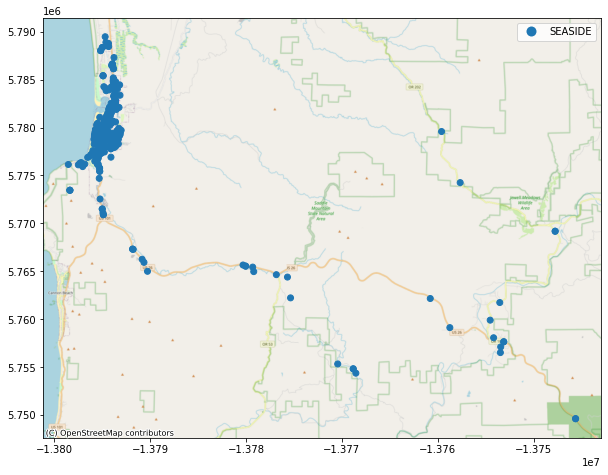

In [54]:
map = viz.plot_gdf_map(commercial_gdf,column='City', category=True)
print("commercial DataAxle for Seaside]")
map

In [55]:
commercial_gdf['City'].describe()

count         810
unique          1
top       SEASIDE
freq          810
Name: City, dtype: object

In [56]:
# set up the nearest neighbor research! 

help(add2incore.nearest_pt_search)



Help on function nearest_pt_search in module pyincore_addons.geoutil_20210618:

nearest_pt_search(gdf_a: geopandas.geodataframe.GeoDataFrame, gdf_b: geopandas.geodataframe.GeoDataFrame, uniqueid_a: str, uniqueid_b: str, k=1, dist_cutoff=99999)
    Given two sets of points add unique id from locations a to locations b
    Inspired by: https://towardsdatascience.com/using-scikit-learns-binary-trees-to-efficiently-find-latitude-and-longitude-neighbors-909979bd929b
    
    This function is used to itdentify buildings associated with businesses, schools, hospitals.
    The locations of businesses might be geocoded by address and may not overlap
    the actual structure. This function helps resolve this issue.
    
    Tested Python Enviroment:
        Python Version      3.7.10
        geopandas version:  0.9.0
        pandas version:     1.2.4
        scipy version:     1.6.3
        numpy version:      1.20.2
    
    Args:
        gdf_a: Geodataframe with list of locations with unique i

In [57]:
buiding_DataAxle_gdf = add2incore.nearest_pt_search(gdf_a = building_gdf,
                                               gdf_b = commercial_gdf,
                                               uniqueid_a = 'guid',
                                               uniqueid_b = 'Company_ID',
                                               k = 2,
                                               dist_cutoff = 250)

In [58]:
buiding_DataAxle_gdf

,Company_ID,geometry_x,LON_x,LAT_x,neighbor,distance,distoutlier,location a index,index,guid,geometry_y,LON_y,LAT_y
0,124479,POINT (428387.199 5093716.738),428387.198599,5.093717e+06,1,0.039486,False,97.0,97,0f27e2b4-1a75-4036-b90b-868dae59fc7e,POINT (428387.231 5093716.761),428387.231082,5.093717e+06
563,10440345,POINT (428434.559 5093713.299),428434.558593,5.093713e+06,1,47.453966,False,97.0,97,0f27e2b4-1a75-4036-b90b-868dae59fc7e,POINT (428387.231 5093716.761),428387.231082,5.093717e+06
608,11442712,POINT (428383.758 5093713.889),428383.757662,5.093714e+06,1,4.506735,False,97.0,97,0f27e2b4-1a75-4036-b90b-868dae59fc7e,POINT (428387.231 5093716.761),428387.231082,5.093717e+06
1,124489,POINT (428216.195 5093863.742),428216.194918,5.093864e+06,1,30.453379,False,531.0,531,5869b1ad-bf56-492e-bb3a-a4b17f9877a2,POINT (428194.051 5093884.647),428194.050573,5.093885e+06
2,124507,POINT (428244.575 5094165.994),428244.574658,5.094166e+06,1,0.054627,False,783.0,783,7e83bda6-6a4a-4247-bf71-1841e90c8ea4,POINT (428244.587 5094165.940),428244.586922,5.094166e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...
778,15333146,POINT (428116.937 5093580.874),428116.937137,5.093581e+06,2,41.973078,False,124.0,124,15091715-bd01-47e7-abdb-462194be6ceb,POINT (428121.034 5093622.647),428121.033542,5.093623e+06
779,15336813,POINT (428276.358 5093682.691),428276.357508,5.093683e+06,2,6.686500,False,530.0,530,5852e60b-3c1d-41cc-b557-8f162d50fb53,POINT (428269.673 5093682.858),428269.673094,5.093683e+06
786,15367206,POINT (428178.012 5093571.161),428178.011592,5.093571e+06,2,48.223379,False,847.0,847,8821da5e-52fa-490f-9a17-589bb1e26670,POINT (428203.737 5093530.372),428203.737090,5.093530e+06
788,15367209,POINT (428756.281 5094777.991),428756.280816,5.094778e+06,2,62.357661,False,1174.0,1174,c36050fe-27e3-4939-a966-48854df7576a,POINT (428713.255 5094732.855),428713.255291,5.094733e+06


In [59]:
buiding_DataAxle_gdf['guid'].describe()

count                                     1416
unique                                     381
top       f278838d-0a00-44b0-824a-32240a0fd364
freq                                       100
Name: guid, dtype: object

In [60]:
buiding_DataAxle_gdf.to_csv('buiding_DataAxle_map.csv')

In [61]:
# for each company there are two nearest buildings. choose randomly here: 

buiding_DataAxle_gdf_final = buiding_DataAxle_gdf.sample(frac=1).drop_duplicates(subset=['Company_ID'], keep='first', inplace=False)
buiding_DataAxle_gdf_final

,Company_ID,geometry_x,LON_x,LAT_x,neighbor,distance,distoutlier,location a index,index,guid,geometry_y,LON_y,LAT_y
462,8504444,POINT (428717.587 5093588.006),428717.586768,5.093588e+06,1,0.035788,False,1306.0,1306,de2bffad-0afb-4cf8-acc4-19f080230be5,POINT (428717.620 5093587.994),428717.620468,5.093588e+06
343,6365128,POINT (429308.661 5094624.392),429308.660546,5.094624e+06,1,52.428020,False,1498.0,1498,fdf7cbb1-d938-4ffd-beeb-58ef8cfce694,POINT (429314.683 5094676.473),429314.683427,5.094676e+06
545,10016595,POINT (428382.635 5092703.703),428382.635486,5.092704e+06,2,47.024724,False,1226.0,1226,cf0cc4d8-6c1f-4031-8764-bfdbcd67fe5a,POINT (428382.039 5092656.682),428382.039411,5.092657e+06
153,2627349,POINT (427248.184 5091587.780),427248.184392,5.091588e+06,1,49.215991,False,1336.0,1336,e244a1fd-3982-49f2-8bb9-ecca2ab4c825,POINT (427223.341 5091630.265),427223.341263,5.091630e+06
688,12804523,POINT (428492.944 5093678.840),428492.944107,5.093679e+06,1,14.065881,False,1119.0,1119,b869173b-7921-4e11-82ff-6b3840c4a233,POINT (428478.881 5093678.568),428478.880854,5.093679e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7,124551,POINT (428058.632 5093834.466),428058.631531,5.093834e+06,1,19.206226,False,1305.0,1305,dd5b7e40-2685-423e-b729-d26c4b4aaa0a,POINT (428077.227 5093829.660),428077.226735,5.093830e+06
17,125131,POINT (429308.661 5094624.392),429308.660546,5.094624e+06,1,52.428020,False,1498.0,1498,fdf7cbb1-d938-4ffd-beeb-58ef8cfce694,POINT (429314.683 5094676.473),429314.683427,5.094676e+06
734,14499497,POINT (429073.944 5094907.223),429073.944122,5.094907e+06,2,28.889177,False,85.0,85,0d484aee-9aff-4a66-815c-b60ef56c79b7,POINT (429101.053 5094917.207),429101.053080,5.094917e+06
376,7001980,POINT (428262.006 5093600.851),428262.006078,5.093601e+06,2,25.645616,False,1366.0,1366,e6a5fcf5-2dd1-4712-8bad-b78705fb915d,POINT (428281.881 5093584.643),428281.880578,5.093585e+06


In [62]:
buiding_DataAxle_gdf_final.to_csv('buiding_DataAxle_map_final.csv')

In [63]:
# Now map between the GUID and the number of employees in each company building

result = buiding_DataAxle_gdf_final.merge(commercial_gdf, left_on='Company_ID', right_on='Company_ID')
result

,Company_ID,geometry_x,LON_x,LAT_x,neighbor,distance,distoutlier,location a index,index,guid,...,Latitude,Longitude,Match_Code,CBSA_Code,CBSA_Level,CSA_Code,FIPS_Code,franchise,NAICS2D,geometry
0,8504444,POINT (428717.587 5093588.006),428717.586768,5.093588e+06,1,0.035788,False,1306.0,1306,de2bffad-0afb-4cf8-acc4-19f080230be5,...,45.992151,-123.920455,P,11820,1,0,41007,1.0,72,POINT (428717.587 5093588.006)
1,6365128,POINT (429308.661 5094624.392),429308.660546,5.094624e+06,1,52.428020,False,1498.0,1498,fdf7cbb1-d938-4ffd-beeb-58ef8cfce694,...,46.001539,-123.912977,X,11820,1,0,41007,NaN,52,POINT (429308.661 5094624.392)
2,10016595,POINT (428382.635 5092703.703),428382.635486,5.092704e+06,2,47.024724,False,1226.0,1226,cf0cc4d8-6c1f-4031-8764-bfdbcd67fe5a,...,45.984158,-123.924647,P,11820,1,0,41007,NaN,72,POINT (428382.635 5092703.703)
3,2627349,POINT (427248.184 5091587.780),427248.184392,5.091588e+06,1,49.215991,False,1336.0,1336,e244a1fd-3982-49f2-8bb9-ecca2ab4c825,...,45.973996,-123.939122,P,11820,1,0,41007,NaN,54,POINT (427248.184 5091587.780)
4,12804523,POINT (428492.944 5093678.840),428492.944107,5.093679e+06,1,14.065881,False,1119.0,1119,b869173b-7921-4e11-82ff-6b3840c4a233,...,45.992945,-123.923369,P,11820,1,0,41007,NaN,99,POINT (428492.944 5093678.840)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
705,124551,POINT (428058.632 5093834.466),428058.631531,5.093834e+06,1,19.206226,False,1305.0,1305,dd5b7e40-2685-423e-b729-d26c4b4aaa0a,...,45.994300,-123.929000,4,11820,1,0,41007,NaN,72,POINT (428058.632 5093834.466)
706,125131,POINT (429308.661 5094624.392),429308.660546,5.094624e+06,1,52.428020,False,1498.0,1498,fdf7cbb1-d938-4ffd-beeb-58ef8cfce694,...,46.001539,-123.912977,X,11820,1,0,41007,NaN,23,POINT (429308.661 5094624.392)
707,14499497,POINT (429073.944 5094907.223),429073.944122,5.094907e+06,2,28.889177,False,85.0,85,0d484aee-9aff-4a66-815c-b60ef56c79b7,...,46.004060,-123.916050,P,11820,1,0,41007,NaN,51,POINT (429073.944 5094907.223)
708,7001980,POINT (428262.006 5093600.851),428262.006078,5.093601e+06,2,25.645616,False,1366.0,1366,e6a5fcf5-2dd1-4712-8bad-b78705fb915d,...,45.992219,-123.926339,0,11820,1,0,41007,NaN,52,POINT (428262.006 5093600.851)


In [64]:
# Show important columns! 
result_final = result[['Company_ID', 'guid', 'Employee_Size_Location', 'Primary_NAICS_Code']]
result_final

,Company_ID,guid,Employee_Size_Location,Primary_NAICS_Code
0,8504444,de2bffad-0afb-4cf8-acc4-19f080230be5,36.0,72251117
1,6365128,fdf7cbb1-d938-4ffd-beeb-58ef8cfce694,2.0,52393002
2,10016595,cf0cc4d8-6c1f-4031-8764-bfdbcd67fe5a,3.0,72251505
3,2627349,e244a1fd-3982-49f2-8bb9-ecca2ab4c825,2.0,54161401
4,12804523,b869173b-7921-4e11-82ff-6b3840c4a233,NaN,99999004
...,...,...,...,...
705,124551,dd5b7e40-2685-423e-b729-d26c4b4aaa0a,17.0,72119909
706,125131,fdf7cbb1-d938-4ffd-beeb-58ef8cfce694,25.0,23731010
707,14499497,0d484aee-9aff-4a66-815c-b60ef56c79b7,4.0,51111003
708,7001980,e6a5fcf5-2dd1-4712-8bad-b78705fb915d,NaN,52211001


In [65]:
# filter out the NaN value for Employee_Size_Location!
result_final = result_final[result_final["Employee_Size_Location"].notna()]
result_final

,Company_ID,guid,Employee_Size_Location,Primary_NAICS_Code
0,8504444,de2bffad-0afb-4cf8-acc4-19f080230be5,36.0,72251117
1,6365128,fdf7cbb1-d938-4ffd-beeb-58ef8cfce694,2.0,52393002
2,10016595,cf0cc4d8-6c1f-4031-8764-bfdbcd67fe5a,3.0,72251505
3,2627349,e244a1fd-3982-49f2-8bb9-ecca2ab4c825,2.0,54161401
5,15600376,c42efed7-fd70-4b2e-9948-60167953eba9,7.0,81211202
...,...,...,...,...
703,8504456,db9beb77-1a97-44a8-ac28-3a626e91de23,10.0,81311008
704,7494572,543c99a1-f069-42a4-8bbc-9cd34d0210d1,3.0,42331013
705,124551,dd5b7e40-2685-423e-b729-d26c4b4aaa0a,17.0,72119909
706,125131,fdf7cbb1-d938-4ffd-beeb-58ef8cfce694,25.0,23731010


In [66]:
result_final['Employee_Size_Location'].sum()

5103.0